# Estimating effect of multiple treatments

In [1]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                    num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df=data['df']
df.head()

X0        X1        W0        W1 W2 W3         v0         v1  \
0 -0.413136  1.588226  0.487770  0.290617  0  0   1.133998   4.769532   
1 -1.134280 -0.198177 -1.796690  2.493473  3  1  11.873946  15.240956   
2 -0.040000 -0.259943  0.509664  2.970383  3  0  14.436375  21.720983   
3  0.428227 -0.179278  1.130956 -1.010133  0  3   3.065979  15.740535   
4  0.879490 -0.668984 -1.299954  0.571345  3  2   8.741953  19.404153   

            y  
0   79.134513  
1  -22.448157  
2  178.499781  
3  200.564517  
4  194.187850

In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

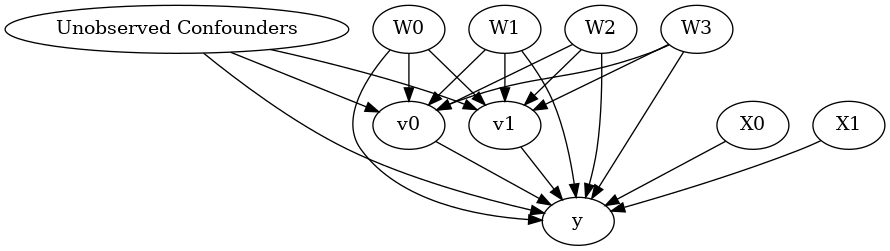

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                      
─────────(Expectation(y|X1,W0,W2,W3,X0,W1))
d[v₀  v₁]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,X1,W0,W2,W3,X0,W1,U) = P(y|v0,v1,X1,W0,W2,W3,X0,W1)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1),
                                       method_params={'need_conditional_estimates': False})
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                      
─────────(Expectation(y|X1,W0,W2,W3,X0,W1))
d[v₀  v₁]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,X1,W0,W2,W3,X0,W1,U) = P(y|v0,v1,X1,W0,W2,W3,X0,W1)

## Realized estimand
b: y~v0+v1+X1+W0+W2+W3+X0+W1+v0*X1+v0*X0+v1*X1+v1*X0
Target units: ate

## Estimate
Mean value: 26.41126316018485



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1))
print(linear_estimate) 

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                      
─────────(Expectation(y|X1,W0,W2,W3,X0,W1))
d[v₀  v₁]                                  
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,X1,W0,W2,W3,X0,W1,U) = P(y|v0,v1,X1,W0,W2,W3,X0,W1)

## Realized estimand
b: y~v0+v1+X1+W0+W2+W3+X0+W1+v0*X1+v0*X0+v1*X1+v1*X0
Target units: ate

## Estimate
Mean value: 26.41126316018485
### Conditional Estimates
__categorical__X1  __categorical__X0            
(-3.537, -1.017]   (-2.9979999999999998, 0.0335]    -52.946620
                   (0.0335, 0.628]                  -36.698335
                   (0.628, 1.109]                   -28.405206
                   (1.109, 1.706]                   -17.981903
                   (1.706, 5.283]                    -2.357185
(-1.017, -0.424]   (-2.9979999999999998, 0.0335]    -19.631323
      

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
